<a href="https://colab.research.google.com/github/debbiedata/debbiedata/blob/main/Capstone_Mbak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd # Corrected import statement
df = pd.read_csv('/content/healthcare_dataset.csv') # Removed leading spaces
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [5]:
# check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
# descriptive statistics for numerical columns
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [7]:
# checking for missing values
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


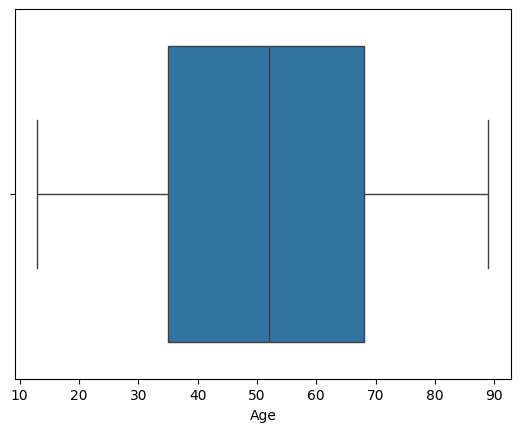

In [16]:
# check for outliers
import seaborn as sns
import matplotlib.pyplot as plt
# Boxplot to check for outliers
import seaborn as sns
sns.boxplot(x=df['Age'])
plt.show()

In [14]:
# Remove ages that are outside a reasonable range
df = df[df['Age'] < 120]

In [17]:
# Standardize gender entries
df['Gender'] = df['Gender'].replace({'M': 'Male', 'F': 'Female'})

In [19]:
# convert dates
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [25]:
# comon diagnosis on region
medical_condition_on_hospital = df.groupby(['Hospital', 'Medical Condition']).size().reset_index(name='Count')
medical_condition_on_hospital.sort_values(by='Count', ascending=False)

,Hospital,Medical Condition,Count
34060,Smith PLC,Arthritis,12
34024,Smith LLC,Arthritis,11
22211,Ltd Smith,Obesity,11
19886,LLC Smith,Hypertension,11
19885,LLC Smith,Diabetes,11
...,...,...,...
16624,"Jackson Chapman, and Foster",Diabetes,1
16625,"Jackson Clark, and May",Cancer,1
16628,"Jackson Collins Thomas, and",Arthritis,1
16629,"Jackson Contreras and Byrd,",Asthma,1


In [40]:
# success rates of various medical plans
# Derive 'Outcome' from 'Discharge Status'
df['Outcome'] = df['Discharge Date'].apply(lambda x: 'Success' if x == 'Discharged to Home' else 'Failure')


# Calculate success rates of various treatment plans
success_rate = df.groupby('Medication')['Outcome'].apply(lambda x: (x == 'Success').mean()).reset_index()
success_rate.sort_values(by='Outcome', ascending=False)



,Medication,Outcome
0,Aspirin,0.0
1,Ibuprofen,0.0
2,Lipitor,0.0
3,Paracetamol,0.0
4,Penicillin,0.0


In [34]:
# demographics by health condition
# Average age by diagnosis
print(df.columns)

demographics = df.groupby('Medical Condition')['Age'].mean().reset_index()

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Length of Stay', 'Outcome'],
      dtype='object')


In [45]:
print(demographics)

  Medical Condition        Age
0         Arthritis  51.565320
1            Asthma  51.575830
2            Cancer  51.558795
3          Diabetes  51.554170
4      Hypertension  51.741915
5           Obesity  51.240277


In [35]:
# Save the cleaned dataset to an Excel file
df.to_excel('cleaned_data.xlsx', index=False)

In [36]:
import os

# Get the current working directory
current_directory = os.getcwd()
print(f"The current working directory is: {current_directory}")


The current working directory is: /content


In [37]:
os.getcwd()

'/content'

In [38]:
from google.colab import files

# Download the Excel file to your local machine
files.download('/content/cleaned_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
!pip install pandas scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Function to find the closest matching column name
def find_closest_column(df, target_column):
  """Finds the closest matching column name in a DataFrame.

  Args:
    df: pandas DataFrame.
    target_column: The target column name to search for.

  Returns:
    The closest matching column name in the DataFrame, or None if not found.
  """
  for column in df.columns:
    if column.lower() == target_column.lower():
      return column
  return None

# Select features and target
feature_columns = ['Age', 'Medical Condition', 'Medication']
X_columns = []
for column in feature_columns:
    closest_column = find_closest_column(df, column)
    if closest_column is not None:
        X_columns.append(closest_column)
    else:
        print(f"Warning: Column '{column}' not found in DataFrame. Skipping.")

X = df[X_columns]
X = pd.get_dummies(X)  # One-hot encode categorical variables
y = df['Outcome']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 1.0
